In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ruta base
ruta_base = '../data/raw/'

# Archivos de compras por año
archivos_compras = [
    'compras_dcto_2019.xlsx',
    'compras_dcto_2020.xlsx',
    'compras_dcto_2021.xlsx',
    'compras_dcto_2022.xlsx',
    'compras_dcto_2023.xlsx',
    'compras_dcto_2024.xlsx',
    'compras_dcto_2025.xlsx'
]

# Cargar todos los archivos y combinarlos
df_compras = pd.concat([
    pd.read_excel(os.path.join(ruta_base, archivo), engine='openpyxl')
    for archivo in archivos_compras
], ignore_index=True)



In [8]:
#Revision inicial de la estructura de los datos 
# Información general
df_compras.info()

# Primeras filas
df_compras.head()

# Columnas disponibles
df_compras.columns.tolist()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8742 entries, 0 to 8741
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cod_cliente    8742 non-null   object        
 1   cliente        8742 non-null   object        
 2   documento      8742 non-null   object        
 3   defecha        8742 non-null   datetime64[ns]
 4   vr_gravado     8742 non-null   int64         
 5   vr_nogravado   8742 non-null   float64       
 6   subtotal       8742 non-null   float64       
 7   iva            8742 non-null   float64       
 8   total          8742 non-null   float64       
 9   tipodocumento  8742 non-null   object        
 10  tipotercero    8742 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 751.4+ KB


['cod_cliente',
 'cliente',
 'documento',
 'defecha',
 'vr_gravado',
 'vr_nogravado',
 'subtotal',
 'iva',
 'total',
 'tipodocumento',
 'tipotercero']

In [9]:
# Validar valores nulos
df_compras.isnull().sum()

# Revisar duplicados
df_compras.duplicated().sum()

# Asegurarse de que las fechas estén limpias
df_compras['defecha'] = pd.to_datetime(df_compras['defecha'], errors='coerce')



### 📊 Total de Compras por Año

Este gráfico representa la evolución del **valor total de compras** realizadas cada año. Se obtuvo al agrupar todas las transacciones por año calendario, sumando el monto total correspondiente.

---

#### 🧮 ¿Qué muestra el gráfico?

- A partir de 2019 hasta 2024, se observa una tendencia creciente en el valor total de compras.
- El año **2022 y 2023** reflejan los picos más altos en términos de inversión total.
- Para el año **2025**, el valor es sustancialmente menor, lo cual puede explicarse por datos parciales (corte temporal en la recolección de datos).

---

#### 🔎 ¿Qué podemos interpretar?

1. **Crecimiento sostenido** hasta 2023 sugiere una expansión del negocio o incremento en la actividad comercial.
2. El **leve descenso en 2024** podría relacionarse con:
   - Factores estacionales.
   - Cambios en la demanda.
   - Ajustes presupuestales o económicos.
3. **2025** debe analizarse con precaución, ya que posiblemente refleja solo los primeros meses del año.

---

Este análisis permite visualizar el **comportamiento anual de las compras**, facilitando la toma de decisiones estratégicas, tales como:
- Planeación de inventario.
- Presupuestos por año.
- Comparativos históricos de desempeño comercial.


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2738/736401326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compras_por_anio, x='anio', y='total', palette='Blues_d')


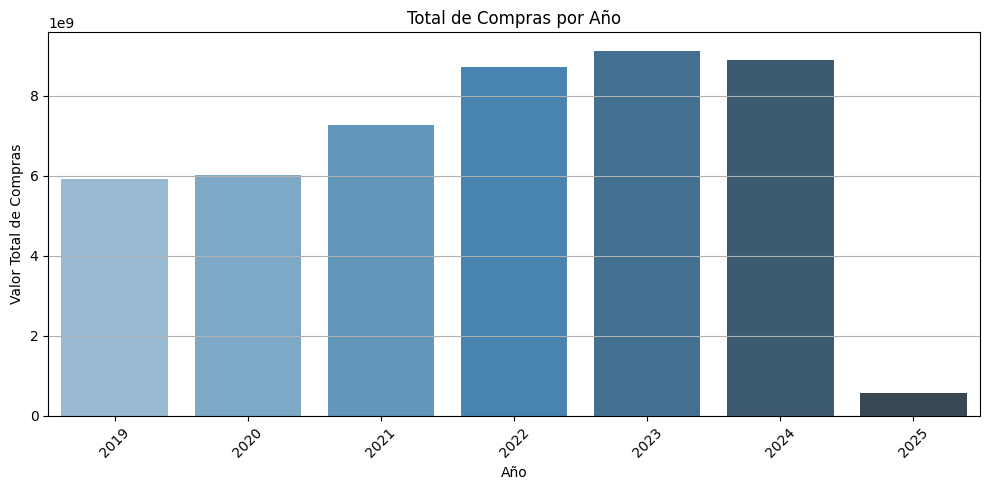

In [10]:
# Agregar columna de año
df_compras['anio'] = df_compras['defecha'].dt.year

# Total por año
compras_por_anio = df_compras.groupby('anio')['total'].sum().reset_index()

# Visualización
plt.figure(figsize=(10, 5))
sns.barplot(data=compras_por_anio, x='anio', y='total', palette='Blues_d')
plt.title('Total de Compras por Año')
plt.xlabel('Año')
plt.ylabel('Valor Total de Compras')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2738/449576583.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compras_anuales, x='anio', y='total', palette='crest')


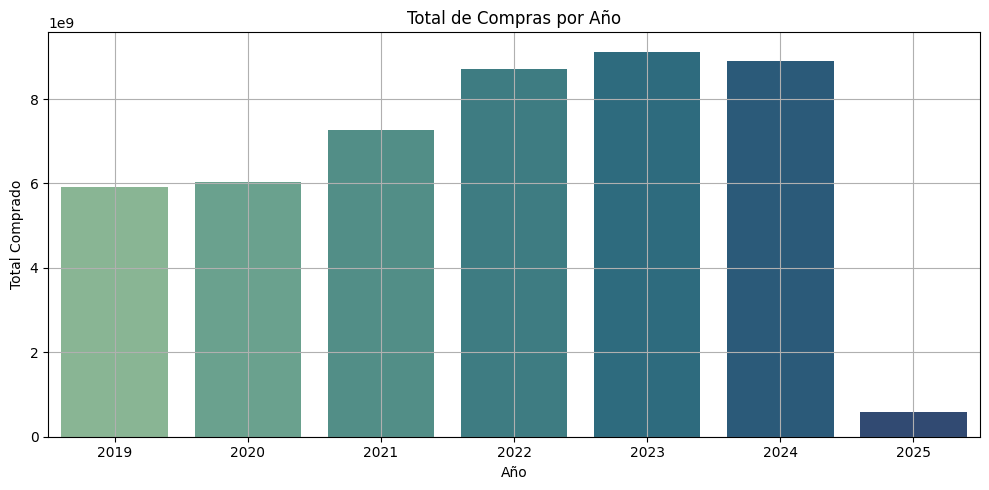

In [12]:
#Analisis temporal de compras
#Identificacion de tendencias de compra a lo largo de los años y meses
df_compras['anio'] = df_compras['defecha'].dt.year
df_compras['mes'] = df_compras['defecha'].dt.month

# Compras por año
compras_anuales = df_compras.groupby('anio')['total'].sum().reset_index()

# Visualización
plt.figure(figsize=(10, 5))
sns.barplot(data=compras_anuales, x='anio', y='total', palette='crest')
plt.title('Total de Compras por Año')
plt.xlabel('Año')
plt.ylabel('Total Comprado')
plt.grid(True)
plt.tight_layout()
plt.show()



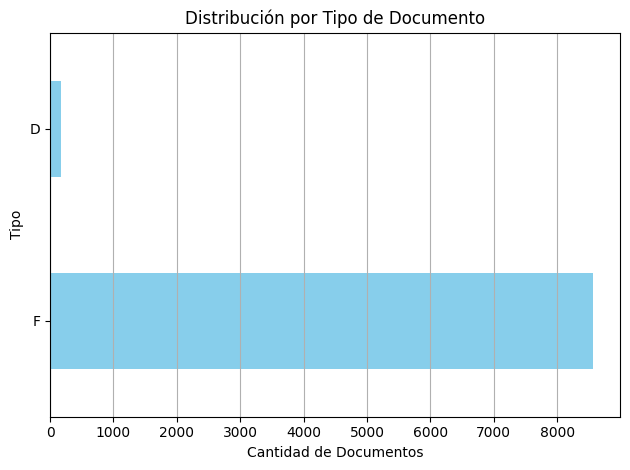

In [13]:
#Distribucion de tipos de documentos 
#Entendimiento del tipo de documentos que predominan en las compras
df_compras['tipodocumento'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Distribución por Tipo de Documento')
plt.xlabel('Cantidad de Documentos')
plt.ylabel('Tipo')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


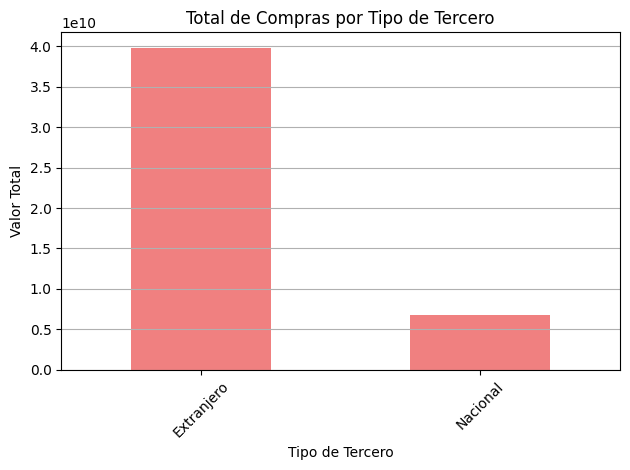

In [14]:
#Compras por tipo de tercero 
#Identificar si se encuentran tipos de terceros que concentran mas compras
df_compras.groupby('tipotercero')['total'].sum().sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Total de Compras por Tipo de Tercero')
plt.ylabel('Valor Total')
plt.xlabel('Tipo de Tercero')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 🚨 Detección de Outliers en el Valor Total de Compras

Este análisis utiliza un diagrama de caja (boxplot) para detectar **compras atípicas** basadas en el valor total de la transacción (`total`).

---

#### 📌 ¿Qué representa este gráfico?

- La caja central muestra el rango intercuartílico (del percentil 25 al 75) del valor total de las compras.
- La línea interna de la caja representa la **mediana**.
- Los puntos fuera de los extremos (líneas verticales) son **outliers**, es decir, compras que están significativamente por fuera del patrón normal.

---

#### 🔍 Hallazgos clave:

- Se observa una gran concentración de compras en rangos bajos, lo que es esperable en compras cotidianas o por unidades pequeñas.
- Sin embargo, hay **varias compras con valores extremadamente altos** (outliers) que se alejan considerablemente del resto.
- Estos outliers pueden deberse a:
  - Grandes adquisiciones por parte de clientes clave.
  - Posibles errores de carga o digitación.
  - Casos especiales que requieren revisión individual.

---

#### ✅ ¿Por qué es útil?

- Permite **identificar riesgos**, inconsistencias o eventos relevantes que deben ser analizados con mayor detalle.
- Ayuda a decidir si es necesario aplicar técnicas de tratamiento de outliers en análisis posteriores (por ejemplo, modelado o segmentación de clientes).



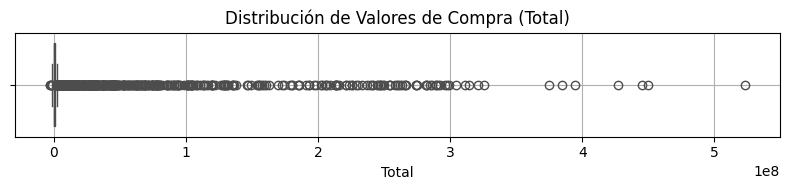

In [15]:
#Deteccion de outliers asociadas a las compras 
#Identificacion de las compras que presentan montos atipicos 
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_compras['total'], color='orange')
plt.title('Distribución de Valores de Compra (Total)')
plt.xlabel('Total')
plt.grid(True)
plt.tight_layout()
plt.show()


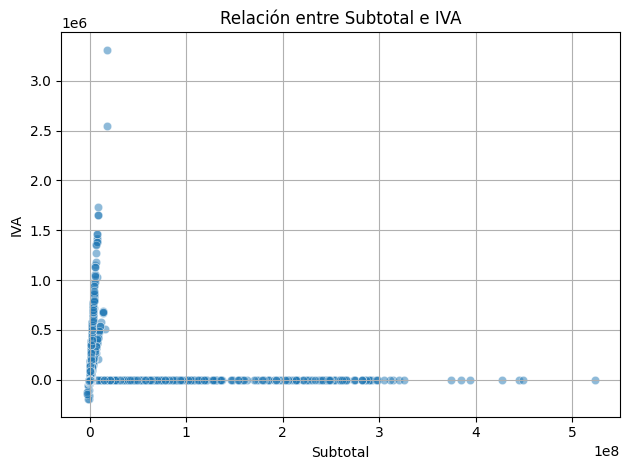

In [16]:
#Relacion entre subtotal e IVA
#Identificar la proporcionalidad entre el subtotal y el impuesto aplicado 
sns.scatterplot(data=df_compras, x='subtotal', y='iva', alpha=0.5)
plt.title('Relación entre Subtotal e IVA')
plt.xlabel('Subtotal')
plt.ylabel('IVA')
plt.grid(True)
plt.tight_layout()
plt.show()


### 🏆 Top 10 Clientes por Compras Acumuladas

Este análisis permite identificar a los **clientes más relevantes en términos de valor total de compras** realizadas. Se agruparon todas las compras por cliente y se sumó el valor total (`total`), para luego mostrar los 10 clientes que más han comprado.

---

#### 📊 ¿Qué representa este gráfico?

- Cada barra horizontal representa el **monto total acumulado de compras** por parte de un cliente.
- Los clientes están ordenados de mayor a menor según el valor total comprado.
- El gráfico permite visualizar claramente a los clientes clave para el negocio.

---

#### 💡 Hallazgos clave:

- El cliente **ST DALFOUR** lidera el ranking con una diferencia significativa frente a los demás.
- **TROPICAL FOODS** y **UNILAC HOLLAND B.V** también destacan por sus volúmenes de compra.
- Este tipo de análisis ayuda a:
  - **Priorizar esfuerzos comerciales** (ej. atención, descuentos, seguimiento personalizado).
  - Evaluar la **concentración de ingresos** en pocos clientes (riesgo de dependencia).
  - Detectar oportunidades para **programas de fidelización o recompra**.

---

#### ✅ ¿Por qué es útil?

- Permite una **segmentación estratégica** de la cartera de clientes basada en comportamiento real de compra.
- Sirve como base para tomar decisiones en pricing, promociones, logística o abastecimiento.



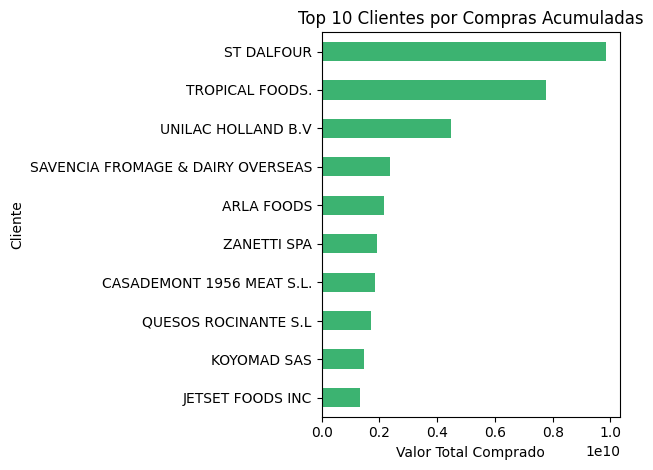

In [17]:
#Compras por cliente (top 10)
#Identificar los clientes mas importantes por monto de compras
top_clientes = df_compras.groupby('cliente')['total'].sum().sort_values(ascending=False).head(10)

top_clientes.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Clientes por Compras Acumuladas')
plt.xlabel('Valor Total Comprado')
plt.ylabel('Cliente')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 📈 Análisis de Concentración de Compras por Cliente (Regla 80/20)

Este análisis permite evaluar si una **pequeña proporción de clientes** concentra la **mayor parte del total de compras**, lo cual responde al principio de Pareto (80/20).

---

#### ⚙️ ¿Cómo se construyó?

1. Se agruparon los datos por cliente y se sumó el valor total comprado.
2. Se ordenaron los clientes en forma descendente según el monto de compras.
3. Se calculó el **porcentaje acumulado** del total de compras por cliente.
4. Se trazó una línea roja horizontal en el 80%, como punto de referencia para la regla 80/20.

---

#### 📊 ¿Qué revela el gráfico?

- La **curva azul** representa el acumulado del valor total de compras por cliente ordenado.
- La **línea roja discontinua** marca el umbral del 80%.
- Permite identificar rápidamente cuántos clientes generan la mayor parte de las compras.
  - Si el 20% de los clientes está a la izquierda de la línea roja y representa el 80% del total, entonces hay **alta concentración**.
  - Si la curva es más plana, la distribución de compras es más equitativa.

---

#### 📌 Conclusión:

- Este análisis ayuda a:
  - Detectar dependencia de pocos clientes.
  - Diseñar **estrategias personalizadas de fidelización** para los clientes más valiosos.
  - Identificar oportunidades de crecimiento en los segmentos de menor volumen.


El gráfico evidencia un patrón claro de alta concentración de compras:

La curva se eleva rápidamente, alcanzando el 80% del valor total de compras con una pequeña proporción de clientes (menos del 20% del total).
Esto confirma empíricamente la Regla de Pareto (80/20) en esta base de datos: un grupo reducido de clientes está generando la mayoría del volumen económico de compras.
A partir de cierto punto, la curva se estabiliza, lo que indica que el resto de clientes (la mayoría) tienen un peso muy bajo en el total de compras acumuladas.

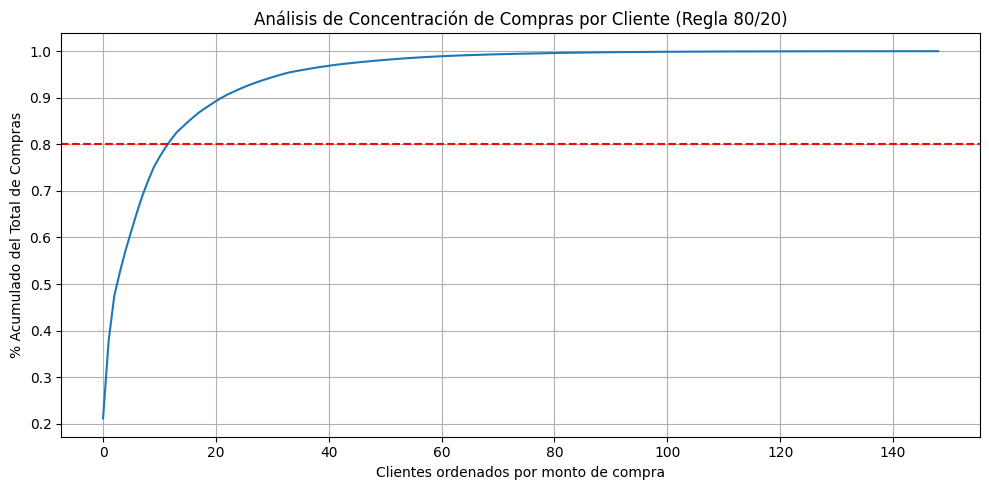

In [18]:
#Concentracion de compras generadas
#Evaluacion si un pequeño grupo de clientes concentra la mayor parte de las compras
compras_por_cliente = df_compras.groupby('cliente')['total'].sum().sort_values(ascending=False)
compras_por_cliente_cumsum = compras_por_cliente.cumsum() / compras_por_cliente.sum()

plt.figure(figsize=(10,5))
compras_por_cliente_cumsum.reset_index(drop=True).plot()
plt.axhline(0.8, color='red', linestyle='--')
plt.title('Análisis de Concentración de Compras por Cliente (Regla 80/20)')
plt.xlabel('Clientes ordenados por monto de compra')
plt.ylabel('% Acumulado del Total de Compras')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2738/1137399579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_compras, x='dia_semana', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')


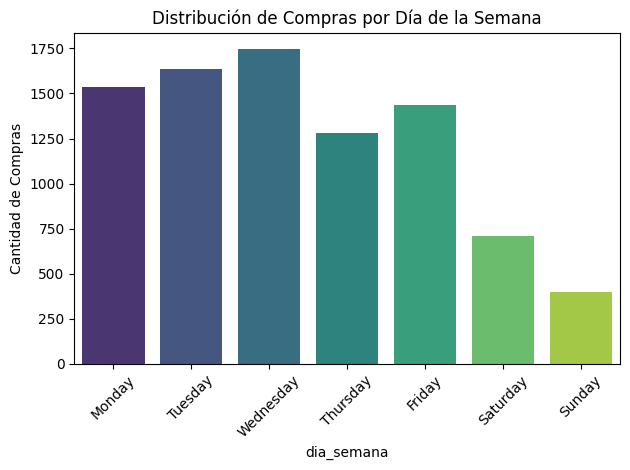

In [19]:
#Distribucion de las compras por dia a la semana
#Detectar que dias se concentran las compras 
df_compras['dia_semana'] = df_compras['defecha'].dt.day_name()

sns.countplot(data=df_compras, x='dia_semana', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')
plt.title('Distribución de Compras por Día de la Semana')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico presenta la evolución del valor total de compras realizadas mes a mes desde el año 2019 hasta 2025. El objetivo de este análisis es identificar patrones temporales, estacionalidades o comportamientos anómalos que ayuden a tomar decisiones más informadas.

🔍 Observaciones clave:

Se observa una alta volatilidad mensual, con picos de compra pronunciados en ciertos meses específicos, lo cual podría estar asociado a promociones, campañas estacionales o acumulación de pedidos.
A partir de 2022 y 2023 se registran los valores más altos de compra mensual, lo que sugiere un posible crecimiento o concentración de la demanda en esos años.

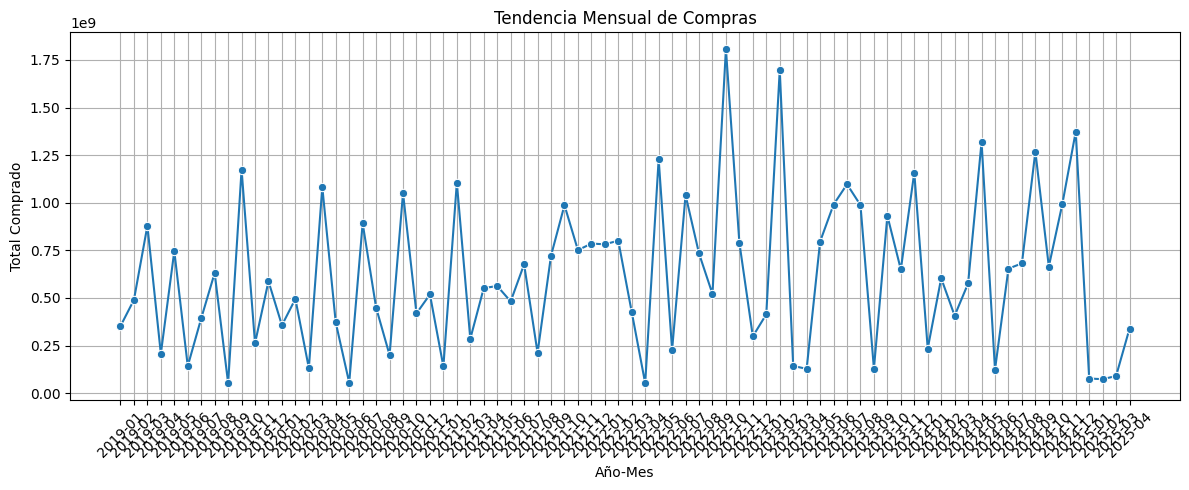

In [20]:
#Evolucion mensual de las compras generadas
#Mostrar la variacion mensual del valor total de las compras 
df_compras['año_mes'] = df_compras['defecha'].dt.to_period('M')
compras_mensuales = df_compras.groupby('año_mes')['total'].sum().reset_index()
compras_mensuales['año_mes'] = compras_mensuales['año_mes'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=compras_mensuales, x='año_mes', y='total', marker='o')
plt.title('Tendencia Mensual de Compras')
plt.xlabel('Año-Mes')
plt.ylabel('Total Comprado')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


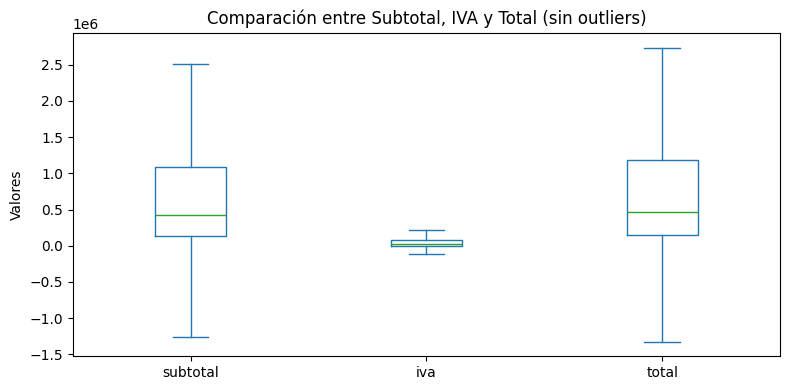

In [21]:
#Comparativa entre subtotal, IVA y total 
df_compras[['subtotal', 'iva', 'total']].plot(kind='box', figsize=(8,4), showfliers=False)
plt.title('Comparación entre Subtotal, IVA y Total (sin outliers)')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()
